In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import shutil
from pathlib import Path
import random

import matplotlib.pyplot as plt
import numpy as np
import PIL
from tqdm import tqdm
import tensorflow as tf
import tensorflow_hub as hub


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [3]:
image_dir = Path('/kaggle/working/trendyol/')

In [4]:
image_dir

PosixPath('/kaggle/working/trendyol')

In [5]:
INPUT_DIR = Path('/kaggle/input/trendyol2/trendyol/')
DATA_DIR = Path('/kaggle/working/trendyol')

In [6]:
for category in INPUT_DIR.iterdir():
    print(category)
    images_list = []
    counter = 0
    for img_path in category.glob('*.jpg'):
        output_path = DATA_DIR / img_path.parent.name / img_path.name
        output_path.parent.mkdir(parents=True, exist_ok=True)
        shutil.copy(img_path, output_path)
        counter += 1

/kaggle/input/trendyol2/trendyol/esofman
/kaggle/input/trendyol2/trendyol/takim
/kaggle/input/trendyol2/trendyol/tisort
/kaggle/input/trendyol2/trendyol/kazak
/kaggle/input/trendyol2/trendyol/pantolon
/kaggle/input/trendyol2/trendyol/mont
/kaggle/input/trendyol2/trendyol/sort
/kaggle/input/trendyol2/trendyol/yelek
/kaggle/input/trendyol2/trendyol/gomlek
/kaggle/input/trendyol2/trendyol/ceket


In [7]:
!find /kaggle/working/trendyol -size  0 -print -delete

/kaggle/working/trendyol/esofman/Ecko-Unlimited-Kadın-Siyah-Eşofman-Altı.jpg
/kaggle/working/trendyol/esofman/Benetton--Yüksek-Bel-Normal-Kalıp--Çok-Renkli-Kadın-Eşofman-Altı-----3J68P0472.jpg


In [8]:
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

images = pd.concat([filepaths, labels], axis=1)

In [9]:
images.Label.value_counts()

pantolon    1426
gomlek      1409
yelek       1307
sort        1203
ceket       1123
esofman     1110
kazak       1091
tisort      1084
takim        700
mont         626
Name: Label, dtype: int64

In [10]:
images

,Filepath,Label
0,/kaggle/working/trendyol/yelek/B074MBMFZD.jpg,yelek
1,/kaggle/working/trendyol/yelek/B0B45SLBTX.jpg,yelek
2,/kaggle/working/trendyol/yelek/B008LN1YDK.jpg,yelek
3,/kaggle/working/trendyol/yelek/Fabrika-Comfort...,yelek
4,/kaggle/working/trendyol/yelek/B07KWJ8VC6.jpg,yelek
...,...,...
11074,/kaggle/working/trendyol/ceket/B06XK9C3C1.jpg,ceket
11075,/kaggle/working/trendyol/ceket/Süvari-CT202160...,ceket
11076,/kaggle/working/trendyol/ceket/B09PV9Y6XW.jpg,ceket
11077,/kaggle/working/trendyol/ceket/Mavi-Siyah-Erke...,ceket


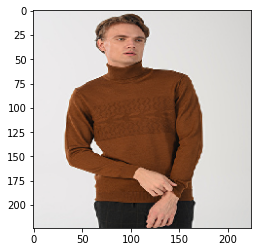

kazak


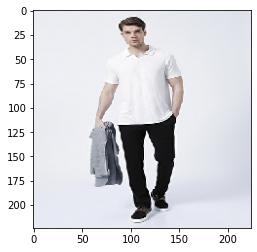

pantolon


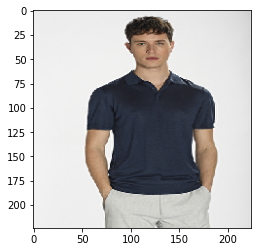

kazak


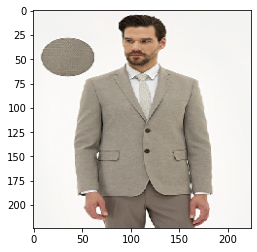

ceket


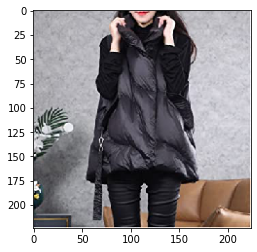

yelek


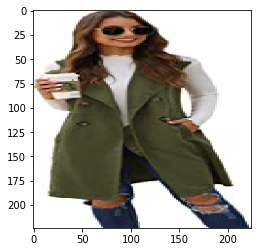

ceket


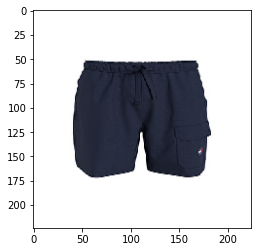

sort


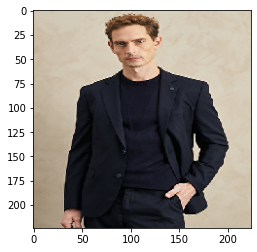

takim


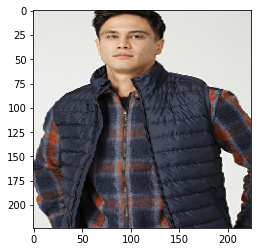

ceket


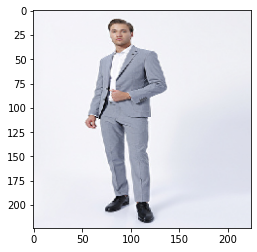

takim


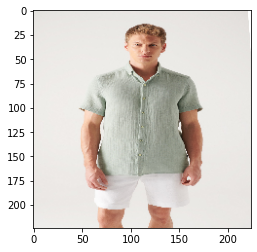

gomlek


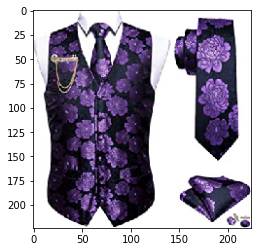

yelek


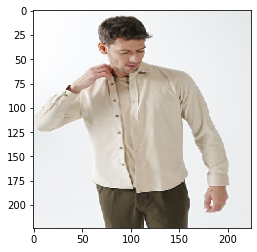

gomlek


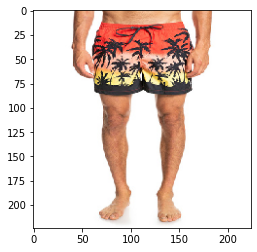

sort


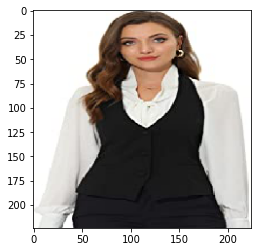

yelek


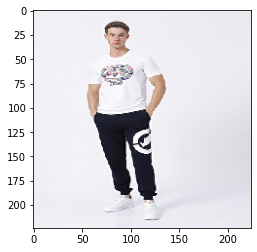

esofman


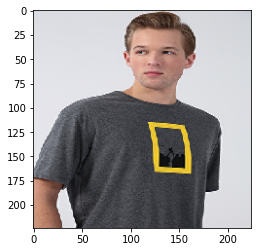

tisort


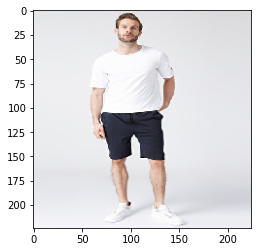

sort


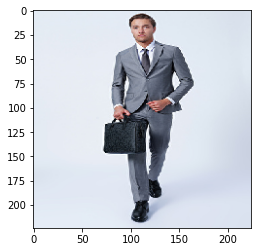

takim


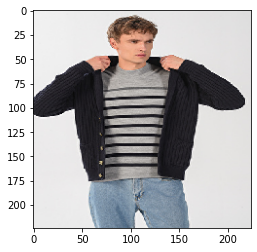

kazak


In [11]:
from tensorflow.keras.preprocessing import image
from glob import glob
multipleImages = glob('/kaggle/working/trendyol/*/*.jpg')

r = random.sample(multipleImages, 20)
true_count = 0
for i in r:
    img = image.load_img(i,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    print(i.split("/")[4])

In [12]:
train_df, test_df = train_test_split(images, train_size=0.7, shuffle=True, random_state=1)

In [13]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.2)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [14]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 6204 validated image filenames belonging to 10 classes.
Found 1551 validated image filenames belonging to 10 classes.
Found 3324 validated image filenames belonging to 10 classes.


In [15]:
pretrained_model = tf.keras.applications.resnet50.ResNet50(
                    input_shape=(224, 224, 3),
                    include_top=False,
                    weights='imagenet',
                    pooling='avg')

pretrained_model.trainable = False

2023-01-23 10:50:23.814849: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 10:50:23.915999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 10:50:23.916841: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 10:50:23.919082: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94781440/94765736 [==============================] - 0s 0us/step


In [16]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(256, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history = model.fit(train_images,validation_data=val_images,epochs=7,
    callbacks=[callbacks])

2023-01-23 10:50:29.113603: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/7


2023-01-23 10:50:32.879299: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


194/194 [==============================] - 56s 241ms/step - loss: 0.8313 - accuracy: 0.7158 - val_loss: 0.6412 - val_accuracy: 0.7982
Epoch 2/7
194/194 [==============================] - 46s 236ms/step - loss: 0.5564 - accuracy: 0.8072 - val_loss: 0.6462 - val_accuracy: 0.7905
Epoch 3/7
194/194 [==============================] - 46s 236ms/step - loss: 0.4544 - accuracy: 0.8412 - val_loss: 0.5848 - val_accuracy: 0.8021
Epoch 4/7
194/194 [==============================] - 45s 234ms/step - loss: 0.3878 - accuracy: 0.8640 - val_loss: 0.5897 - val_accuracy: 0.8021
Epoch 5/7
194/194 [==============================] - 44s 229ms/step - loss: 0.3372 - accuracy: 0.8806 - val_loss: 0.5622 - val_accuracy: 0.8227
Epoch 6/7
194/194 [==============================] - 45s 230ms/step - loss: 0.2729 - accuracy: 0.9047 - val_loss: 0.6110 - val_accuracy: 0.8169
Epoch 7/7
194/194 [==============================] - 45s 233ms/step - loss: 0.2327 - accuracy: 0.9176 - val_loss: 0.5400 - val_accuracy: 0.8414


In [19]:
results = model.evaluate(test_images, verbose=0)
print(results)
print(f"Test Accuracy: {np.round(results[1] * 100,2)}%")

[0.5971105098724365, 0.8206979632377625]
Test Accuracy: 82.07%


In [20]:
predictions = np.argmax(model.predict(test_images), axis=1)
matrix = confusion_matrix(test_images.labels, predictions)
report= classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)

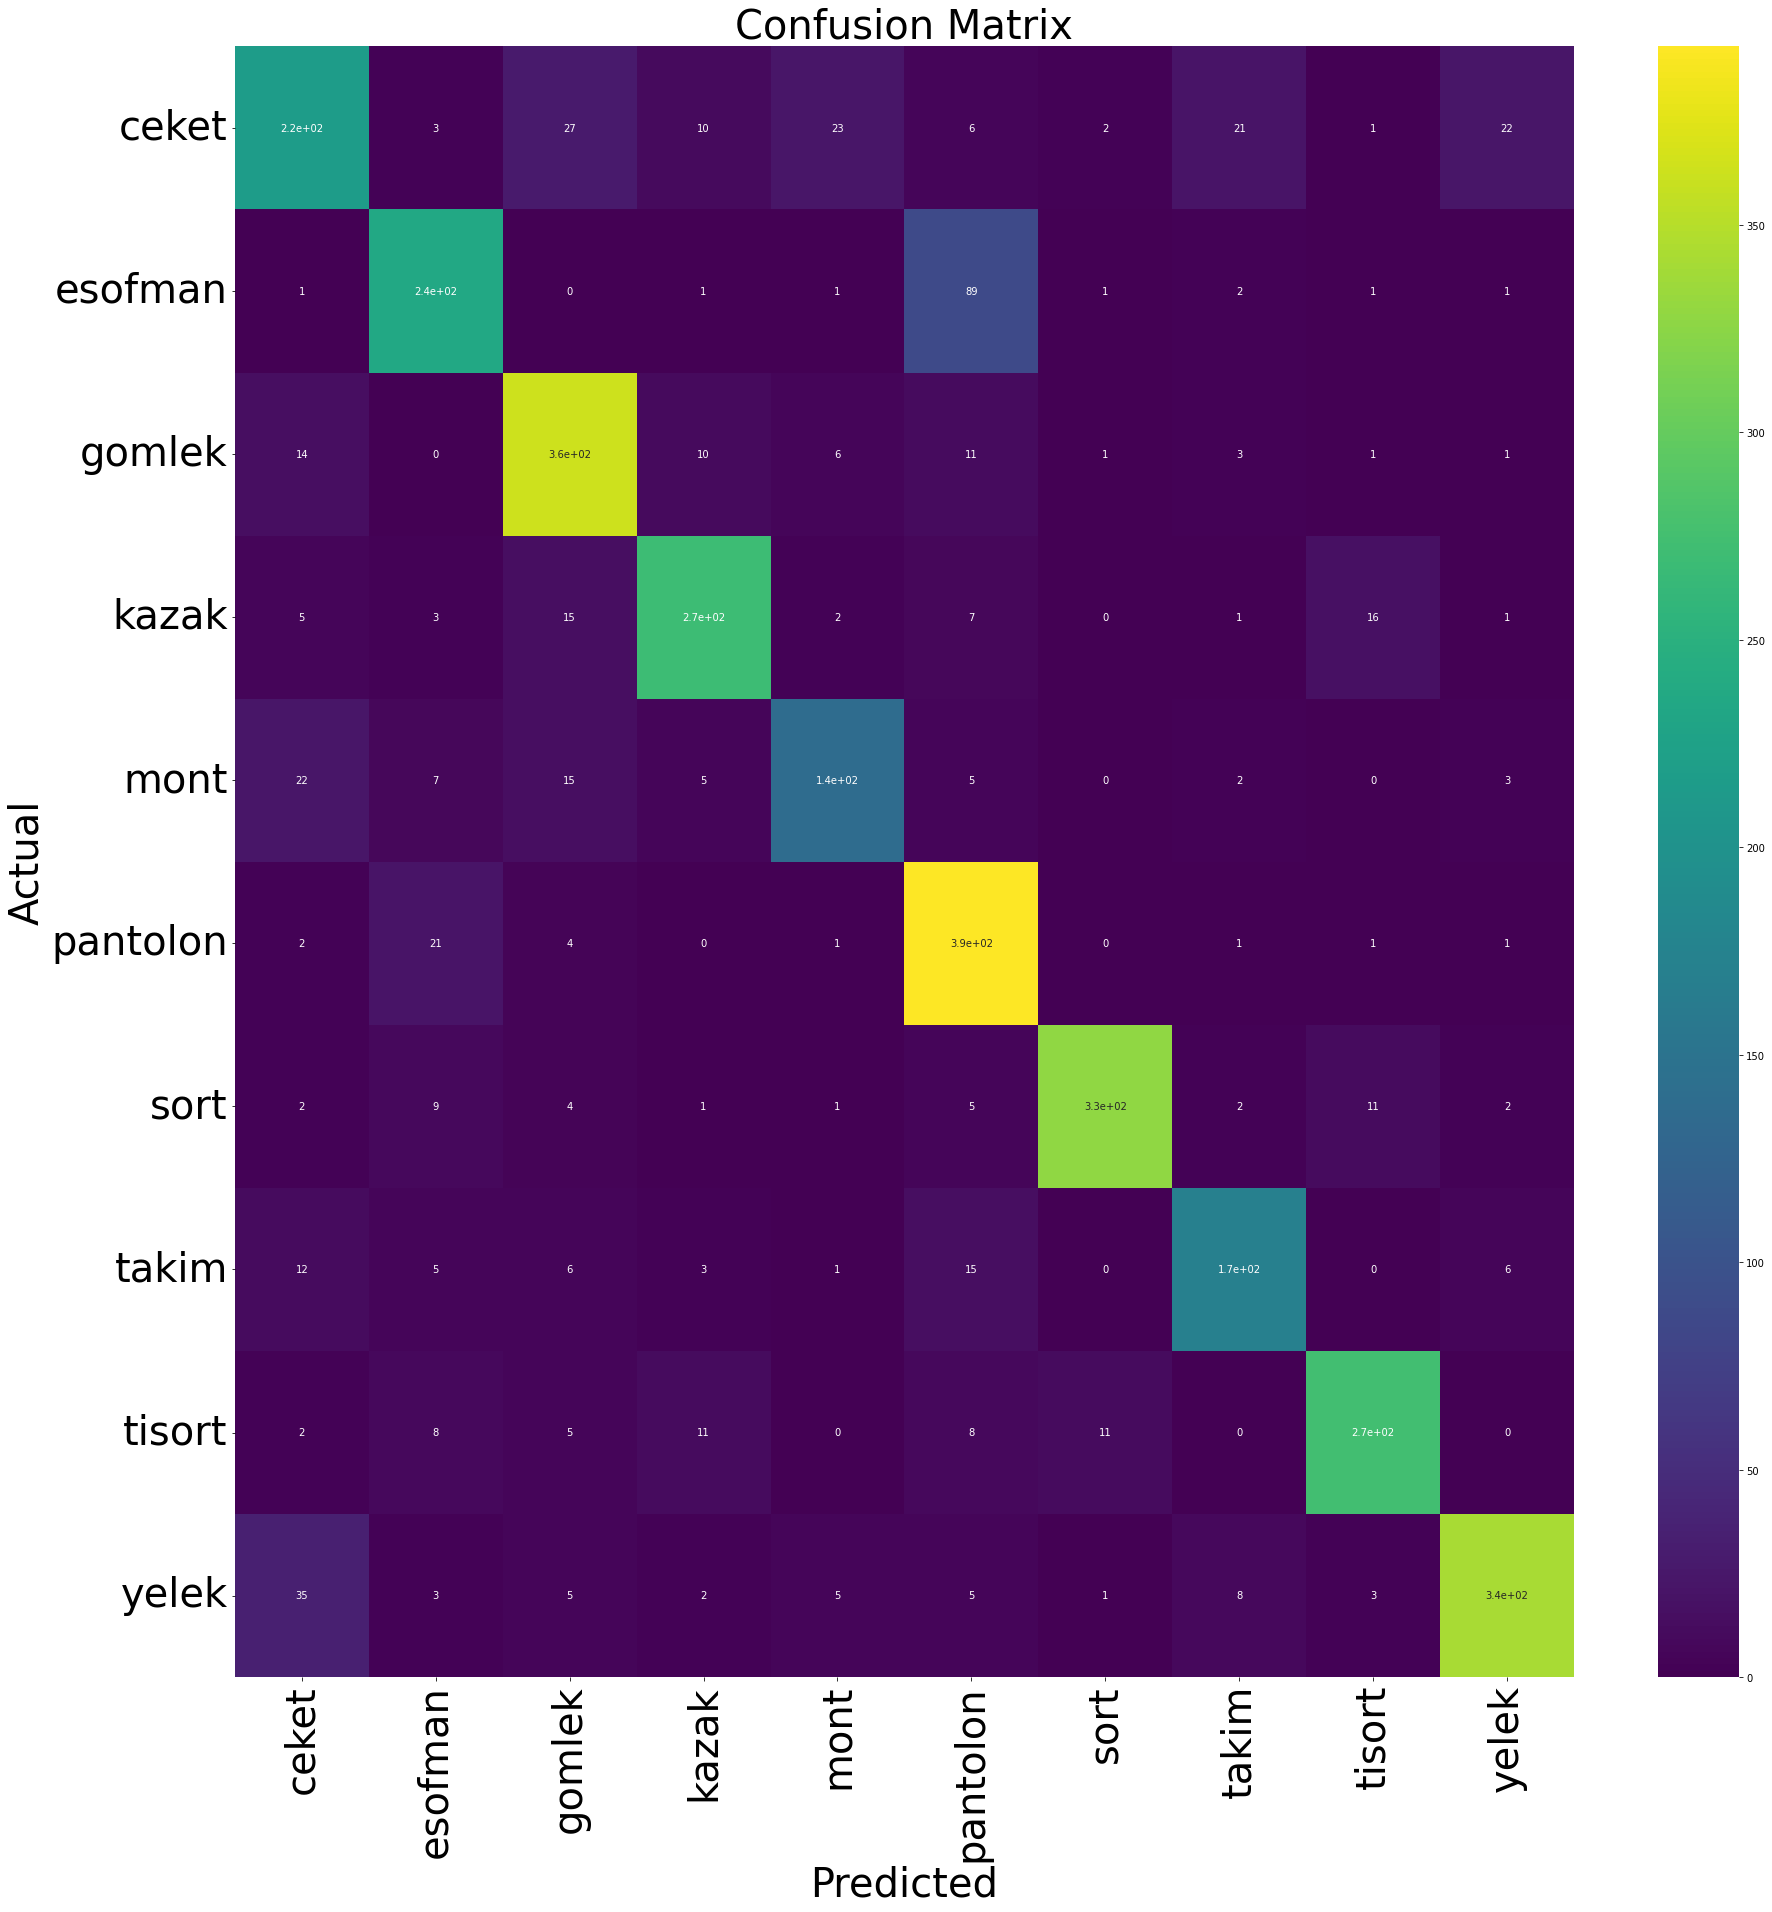

In [21]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(matrix, annot=True, cmap='viridis')
plt.xticks(ticks=np.arange(10) + 0.5, labels=test_images.class_indices, rotation=90,fontsize = 40)
plt.yticks(ticks=np.arange(10) + 0.5, labels=test_images.class_indices, rotation=0,fontsize = 40)
plt.title("Confusion Matrix",fontsize = 40)
plt.xlabel("Predicted",fontsize = 40)
plt.ylabel("Actual",fontsize = 40)
plt.show()
fig.savefig("Confusion Matrix",dpi=700)

In [22]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       ceket       0.69      0.65      0.67       331
     esofman       0.80      0.71      0.75       332
      gomlek       0.82      0.89      0.85       410
       kazak       0.86      0.84      0.85       320
        mont       0.78      0.70      0.74       197
    pantolon       0.72      0.93      0.81       424
        sort       0.95      0.90      0.93       365
       takim       0.81      0.78      0.79       217
      tisort       0.89      0.86      0.87       319
       yelek       0.90      0.84      0.87       409

    accuracy                           0.82      3324
   macro avg       0.82      0.81      0.81      3324
weighted avg       0.82      0.82      0.82      3324



In [23]:
data_his = pd.DataFrame(history.history)
data_his

,loss,accuracy,val_loss,val_accuracy
0,0.831260,0.715828,0.641210,0.798195
1,0.556445,0.807221,0.646234,0.790458
2,0.454362,0.841231,0.584792,0.802063
3,0.387812,0.863959,0.589724,0.802063
4,0.337223,0.880561,0.562187,0.822695
5,0.272945,0.904739,0.611004,0.816892
6,0.232672,0.917634,0.540012,0.841393


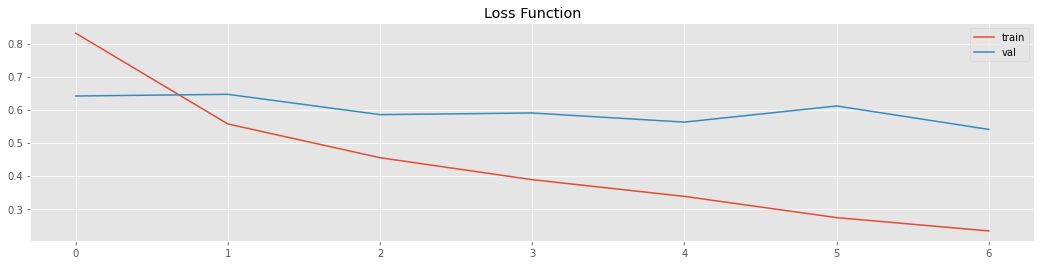

In [24]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['loss'], label = 'train')
plt.plot(data_his['val_loss'], label = 'val')
plt.legend()
plt.title('Loss Function')
plt.show()
fig.savefig("Loss Function",dpi=700)

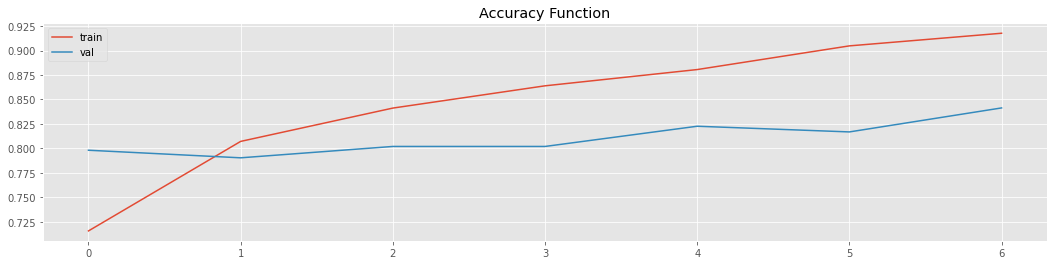

In [25]:
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['accuracy'], label = 'train')
plt.plot(data_his['val_accuracy'], label = 'val')
plt.legend()
plt.title('Accuracy Function')
plt.show()
fig.savefig("Accuracy Function",dpi=700)

In [26]:
train_images.class_indices.keys()

dict_keys(['ceket', 'esofman', 'gomlek', 'kazak', 'mont', 'pantolon', 'sort', 'takim', 'tisort', 'yelek'])

In [27]:
train_images.class_indices.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
df=pd.DataFrame({'names':list(train_images.class_indices.keys()),
                 'index':list(train_images.class_indices.values())})

In [29]:
df.iloc[0]['names']

'ceket'

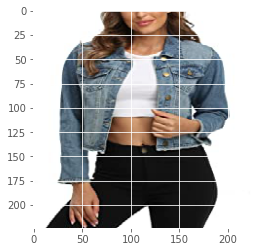

0    ceket
Name: names, dtype: object
ceket
0    True
Name: names, dtype: bool


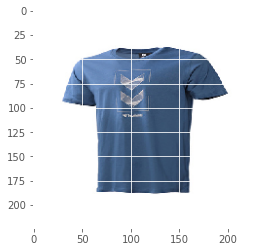

8    tisort
Name: names, dtype: object
tisort
8    True
Name: names, dtype: bool


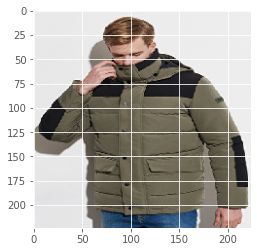

0    ceket
Name: names, dtype: object
mont
0    False
Name: names, dtype: bool


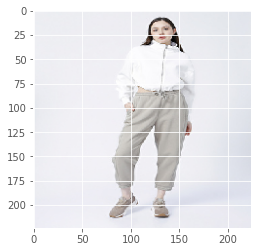

1    esofman
Name: names, dtype: object
esofman
1    True
Name: names, dtype: bool


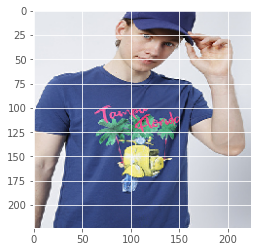

8    tisort
Name: names, dtype: object
tisort
8    True
Name: names, dtype: bool


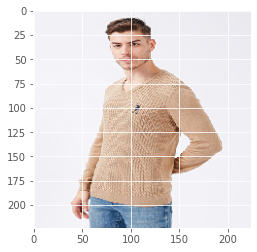

8    tisort
Name: names, dtype: object
kazak
8    False
Name: names, dtype: bool


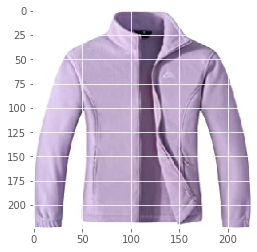

0    ceket
Name: names, dtype: object
ceket
0    True
Name: names, dtype: bool


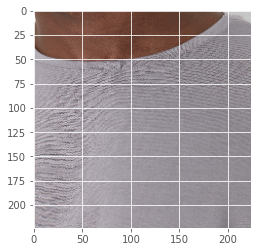

2    gomlek
Name: names, dtype: object
tisort
2    False
Name: names, dtype: bool


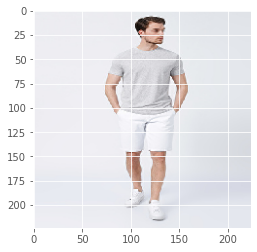

5    pantolon
Name: names, dtype: object
sort
5    False
Name: names, dtype: bool


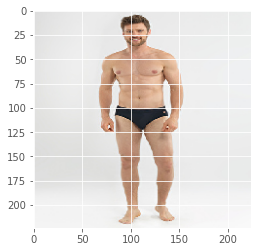

6    sort
Name: names, dtype: object
sort
6    True
Name: names, dtype: bool


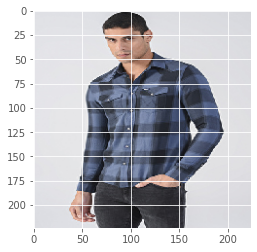

2    gomlek
Name: names, dtype: object
gomlek
2    True
Name: names, dtype: bool


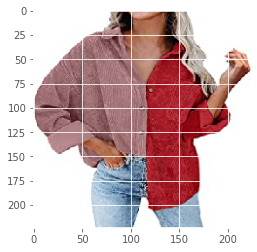

0    ceket
Name: names, dtype: object
ceket
0    True
Name: names, dtype: bool


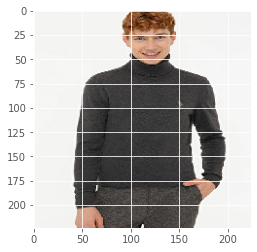

3    kazak
Name: names, dtype: object
kazak
3    True
Name: names, dtype: bool


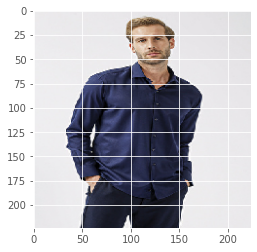

2    gomlek
Name: names, dtype: object
gomlek
2    True
Name: names, dtype: bool


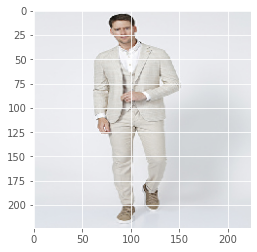

5    pantolon
Name: names, dtype: object
takim
5    False
Name: names, dtype: bool


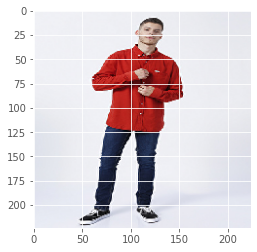

8    tisort
Name: names, dtype: object
pantolon
8    False
Name: names, dtype: bool


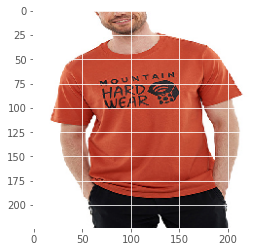

8    tisort
Name: names, dtype: object
tisort
8    True
Name: names, dtype: bool


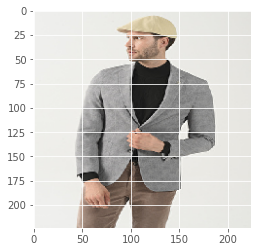

2    gomlek
Name: names, dtype: object
ceket
2    False
Name: names, dtype: bool


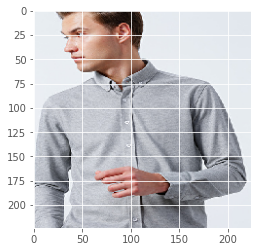

2    gomlek
Name: names, dtype: object
gomlek
2    True
Name: names, dtype: bool


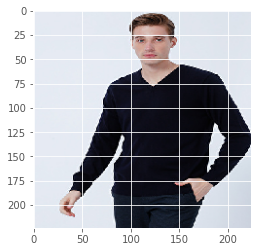

8    tisort
Name: names, dtype: object
kazak
8    False
Name: names, dtype: bool
Number of True Predictions  12


In [30]:
from tensorflow.keras.preprocessing import image
from glob import glob
multipleImages = glob('/kaggle/working/trendyol/*/*.jpg')

r = random.sample(multipleImages, 20)
true_count = 0
for i in r:
    img = image.load_img(i,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    predictions = np.argmax(model.predict(images), axis=1)
    print(df.iloc[predictions]['names'])
    print(i.split("/")[4])
    if((df.iloc[predictions]['names'] == i.split("/")[4]).bool()):
        true_count += 1
        
    print(df.iloc[predictions]['names'] == i.split("/")[4])

print("Number of True Predictions ", true_count)

In [31]:
model.save("trendyol.h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
